# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library


In [3]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# function to lod=ad the dataset
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('AAPL')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


In [5]:
df = df.drop(['Date'], axis = 1)
df.head()

C:\Users\RISHI\AppData\Local\Temp\ipykernel_19004\3502562368.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


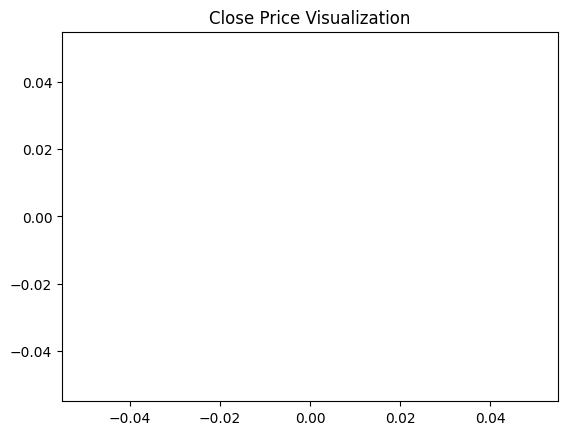

In [6]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [7]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


# Plotting moving averages of 100 day

---



In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

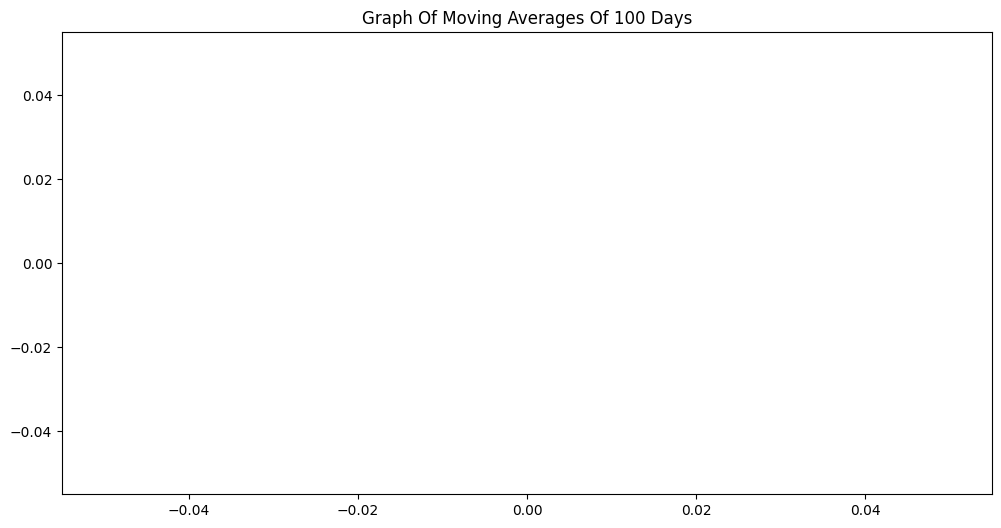

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

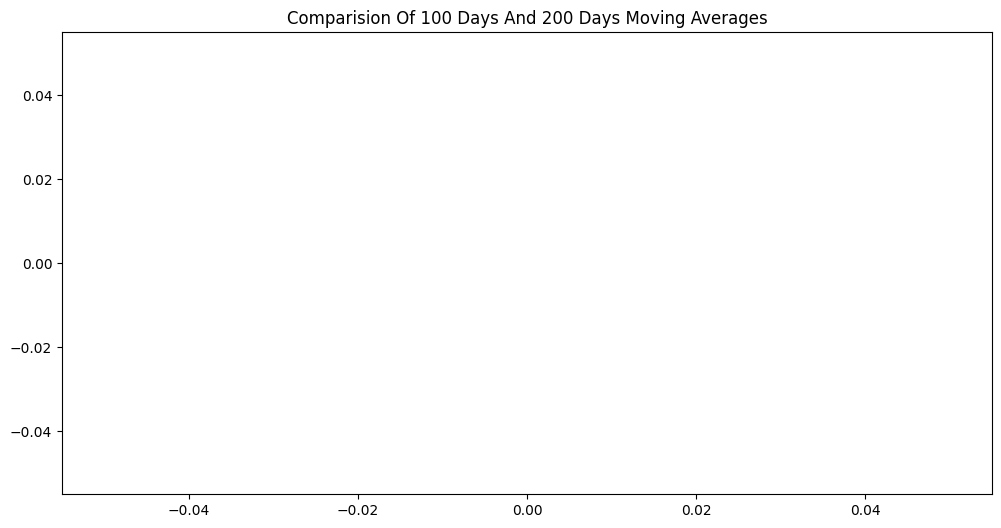

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(0, 6)

# Spliting the dataset into training (70%) and testing (30%) set

In [13]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(0, 7)
(0, 7)


In [14]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


In [15]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


# Using MinMax scaler for normalization of the dataset

---



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [23]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02631937],
       [0.02197939],
       [0.01952935],
       ...,
       [0.90705476],
       [0.92705877],
       [0.88556423]])

In [24]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [25]:
x_train.shape

(1736, 100, 1)

# ML Model (LSTM)

---



In [26]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\RISHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [30]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 0.0628 - mean_absolute_error: 0.1589
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0076 - mean_absolute_error: 0.0547
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0058 - mean_absolute_error: 0.0464
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0059 - mean_absolute_error: 0.0477
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0048 - mean_absolute_error: 0.0424
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0048 - mean_absolute_error: 0.0417
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0047 - mean_absolute_error: 0.0407
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0053 - mean_absolute_error: 0.0469
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0051 - mean_absolute_error: 0.0432
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0036 - mean_absolute_error: 0.0371
Epoch 11/100
55/55 ━━━━━━━━━━

In [31]:
model.save('keras_model.h5')

In [32]:

test_close.shape
test_close

array([[162.17604188],
       [165.85160767],
       [165.99900306],
       [163.59123953],
       [158.34327428],
       [159.45380497],
       [153.22309003],
       [156.50551187],
       [159.05083612],
       [154.00927437],
       [155.42444099],
       [156.91824346],
       [161.02623866],
       [153.54664901],
       [152.48365943],
       [153.06435905],
       [151.0762377 ],
       [140.51568121],
       [142.30694138],
       [143.25176455],
       [146.50950978],
       [144.53123554],
       [137.67130943],
       [136.8937958 ],
       [135.61427683],
       [138.58659874],
       [136.24416789],
       [135.22060365],
       [143.09431328],
       [146.7162168 ],
       [147.53309012],
       [145.49575338],
       [144.58044581],
       [144.7083895 ],
       [142.070736  ],
       [146.23389301],
       [144.75760527],
       [138.06496155],
       [130.77196562],
       [131.02787945],
       [132.16958117],
       [129.99447152],
       [128.01620272],
       [131

In [33]:
past_100_days = pd.DataFrame(train_close[-100:])

In [34]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [35]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [36]:
final_df.head()

,0
0,158.141789
1,157.778634
2,156.620446
3,156.424117
4,157.032662


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.25338415],
       [0.25065714],
       [0.24196008],
       [0.24048581],
       [0.24505549],
       [0.30025987],
       [0.23584266],
       [0.27475834],
       [0.27674822],
       [0.31205243],
       [0.33453209],
       [0.35502189],
       [0.35723311],
       [0.40079201],
       [0.35752761],
       [0.35649595],
       [0.38723032],
       [0.31831715],
       [0.30615607],
       [0.33033105],
       [0.34123933],
       [0.36195003],
       [0.37108926],
       [0.39371643],
       [0.38759888],
       [0.38863091],
       [0.37845972],
       [0.37654329],
       [0.41192127],
       [0.3896626 ],
       [0.33873325],
       [0.34013352],
       [0.31205249],
       [0.33593248],
       [0.36394001],
       [0.36143409],
       [0.32870943],
       [0.32996246],
       [0.31883325],
       [0.29657456],
       [0.27770639],
       [0.24527683],
       [0.23761156],
       [0.27092576],
       [0.26318679],
       [0.28721418],
       [0.32001225],
       [0.348

In [38]:
input_data.shape

(887, 1)

# Testing the model

---



In [39]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(787, 100, 1)
(787,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [41]:
# Making predictions

y_pred = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [42]:
y_pred.shape

(787, 1)

In [43]:
y_test

array([0.28367813, 0.31127867, 0.31238549, 0.29430513, 0.25489713,
       0.26323633, 0.21644867, 0.24109702, 0.26021035, 0.22235229,
       0.23297905, 0.2441963 , 0.27504404, 0.21887834, 0.21089615,
       0.21525673, 0.20032754, 0.12102627, 0.13447719, 0.14157205,
       0.16603509, 0.15117985, 0.09966733, 0.09382883, 0.08422067,
       0.10654041, 0.08895064, 0.0812645 , 0.14038972, 0.1675873 ,
       0.17372136, 0.1584226 , 0.15154938, 0.15251013, 0.13270348,
       0.16396543, 0.1528797 , 0.10262334, 0.04785881, 0.04978052,
       0.05835378, 0.04202046, 0.02716525, 0.05192367, 0.06204889,
       0.07705192, 0.09981506, 0.12050883, 0.11629613, 0.08178208,
       0.08022984, 0.07128713, 0.08407316, 0.11053154, 0.1248693 ,
       0.13942873, 0.14245908, 0.14312404, 0.1226521 , 0.13070783,
       0.17283427, 0.17992944, 0.15908792, 0.18273778, 0.20771818,
       0.21429596, 0.2040969 , 0.19116319, 0.19352821, 0.22604674,
       0.25753083, 0.25583127, 0.24910575, 0.25457463, 0.29278

In [44]:
y_pred

array([[0.3458712 ],
       [0.33743814],
       [0.32857507],
       [0.31985503],
       [0.3115985 ],
       [0.30368415],
       [0.29610878],
       [0.2887665 ],
       [0.28189123],
       [0.27582502],
       [0.27076483],
       [0.26671627],
       [0.26361766],
       [0.26142612],
       [0.25996125],
       [0.25906792],
       [0.25854996],
       [0.25815815],
       [0.2572751 ],
       [0.25525576],
       [0.2518387 ],
       [0.24667294],
       [0.23998666],
       [0.23227847],
       [0.22308598],
       [0.21248364],
       [0.20110454],
       [0.1896897 ],
       [0.17878611],
       [0.1694267 ],
       [0.16259187],
       [0.15863651],
       [0.15734397],
       [0.15805516],
       [0.16017064],
       [0.16326123],
       [0.16704956],
       [0.17127582],
       [0.17564104],
       [0.17976668],
       [0.1831218 ],
       [0.18497318],
       [0.18440267],
       [0.1808657 ],
       [0.17458493],
       [0.16621694],
       [0.15692565],
       [0.148

In [45]:
scaler.scale_

array([0.00750919])

In [47]:
scale_factor = 1/0.00750909
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

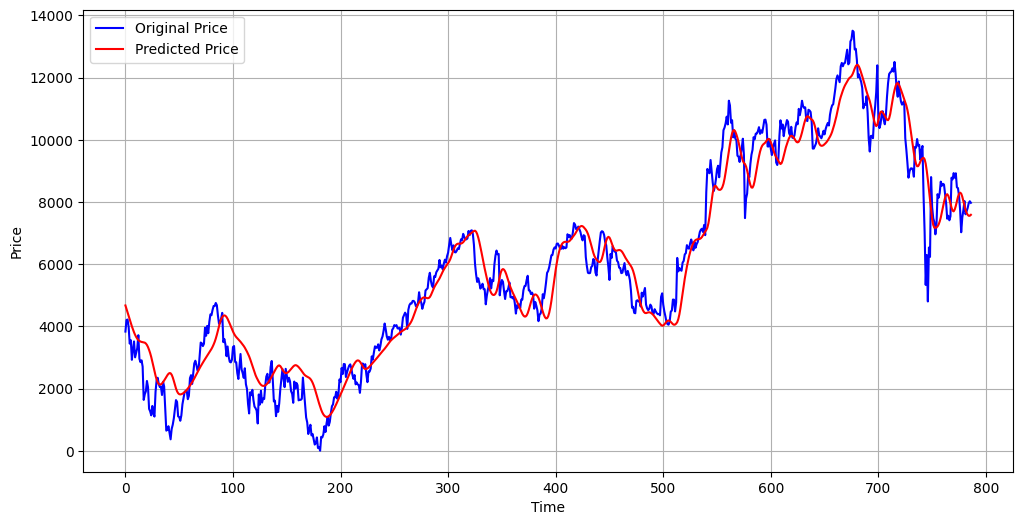

In [48]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

In [49]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 10.27%


In [50]:
#Calcukating R2 score

from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9415811494814351


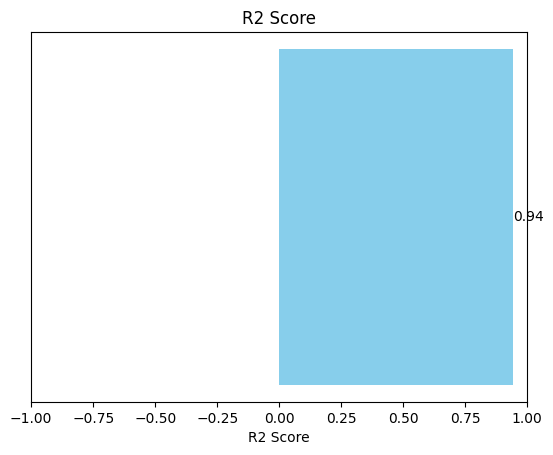

In [51]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

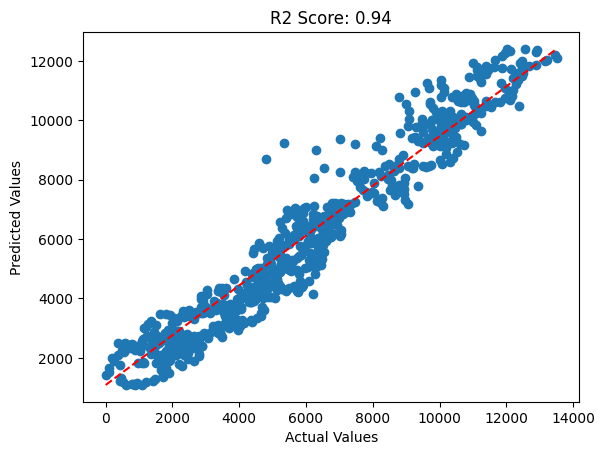

In [52]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()